## Feed-forward Neural Network for Classification

#### Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load original Iris dataset.
iris = datasets.load_iris()
old_X = iris.data
old_Y = iris.target

# Create the modified Iris dataset.
new_X = old_X[old_Y>0][:,2:]            # We only use last 2 features.
new_Y = old_Y[old_Y>0].reshape(-1,1)    # Use class 1,2 and convert 
new_Y[new_Y==1] = -1                    # them into class -1,1.
new_Y[new_Y==2] = 1        

# Generate training set and test set.
X_train =      np.vstack([new_X[:35],   new_X[50:85]])  # Shape: [70,2].
Y_train = np.concatenate([new_Y[:35],   new_Y[50:85]])  # Shape: [70,1].
X_test  =      np.vstack([new_X[35:50], new_X[85:100]]) # Shape: [30,2].
Y_test  = np.concatenate([new_Y[35:50], new_Y[85:100]]) # Shape: [30,1].

print(X_train.shape)     # X_train.shape should be (70,2), which shows 
                         # 70 training points where each has 2 features.
print(Y_train.shape)     # Y_train.shape should be (70,1) which shows 70 
print(np.unique(Y_train))# points where each point has label -1, 1.

(70, 2)
(70, 1)
[-1  1]


#### Visualization of Original Data

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.utils import shuffle
import scipy.io as sio
plt.rcParams['figure.figsize'] = 8,8

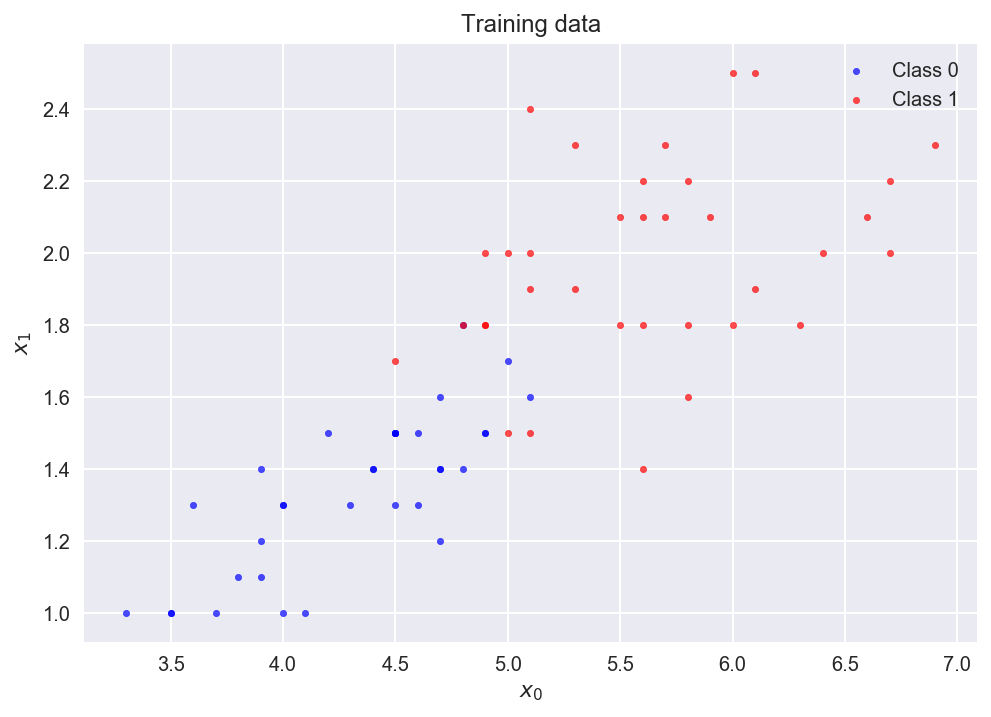

In [3]:
# Visualization of the training data.
mpl.style.use('seaborn')

fig = plt.figure()
plt.scatter(X_train[Y_train[:,0]==-1, 0], X_train[Y_train[:,0]==-1, 1], 
            marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==+1, 0], X_train[Y_train[:,0]==+1, 1], 
            marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend(loc='upper right', fontsize=10)
plt.title('Training data')
plt.show()

#### Training Procedure

In [4]:
from nndemohelp import L_prime, L, sigmoid

learning_rate = 0.0025
n_iter = 20000                        # Number of iterations
np.random.seed(0)
W1 = np.random.randn(2,3)/((2*3)**2)   # Weight matrix 1.
b1 = np.random.randn(3,1)/((3*1)**2)   # Bias vector 1.
W2 = np.random.randn(3,1)/((3*1)**2)   # Weight matrix 2.
b2 = np.random.randn(1,1)/((1*1)**2)   # Bias vector 2.

# We will keep track of training loss over iterations.
iterations = [0]
L_list = [L(X_train, Y_train, W1, b1, W2, b2)]
for i in range(n_iter):
    
    gradient_W1, gradient_b1, gradient_W2, gradient_b2 = \
        L_prime(X_train, Y_train, W1, b1, W2, b2)
    W1_new = W1 - learning_rate * gradient_W1
    b1_new = b1 - learning_rate * gradient_b1
    W2_new = W2 - learning_rate * gradient_W2
    b2_new = b2 - learning_rate * gradient_b2
    iterations.append(i+1)
    L_list.append(L(X_train, Y_train, W1_new, b1_new, W2_new, b2_new))
    
    # L1-norm as jumping out criteria.
    norm = np.abs(W1_new-W1).sum() + np.abs(b1_new-b1).sum() + \
           np.abs(W2_new-W2).sum() + np.abs(b2_new-b2).sum() 
    
    if i%5000 == 0:
        print('i: {:6d} L: {:.3f} norm:{:.6f}'.format(i, L_list[-1], norm))
        
    W1 = W1_new
    b1 = b1_new
    W2 = W2_new
    b2 = b2_new
    
print ('W1 matrix: \n' + str(W1))
print ('b1 vector: \n' + str(b1))
print ('W2 matrix: \n' + str(W2))
print ('b2 vector: \n' + str(b2))

i:      0 L: 54.115 norm:0.105332
i:   5000 L: 10.233 norm:0.002477
i:  10000 L: 9.771 norm:0.000595
i:  15000 L: 9.735 norm:0.000244
W1 matrix: 
[[-1.10079231 -1.05416935 -0.84165535]
 [-1.64995622 -1.94383682 -1.73100606]]
b1 vector: 
[[8.05291103]
 [7.54617421]
 [6.02069302]]
W2 matrix: 
[[-8.46366284]
 [-8.01816479]
 [-6.38502571]]
b2 vector: 
[[8.43773876]]


#### Training Loss Curve

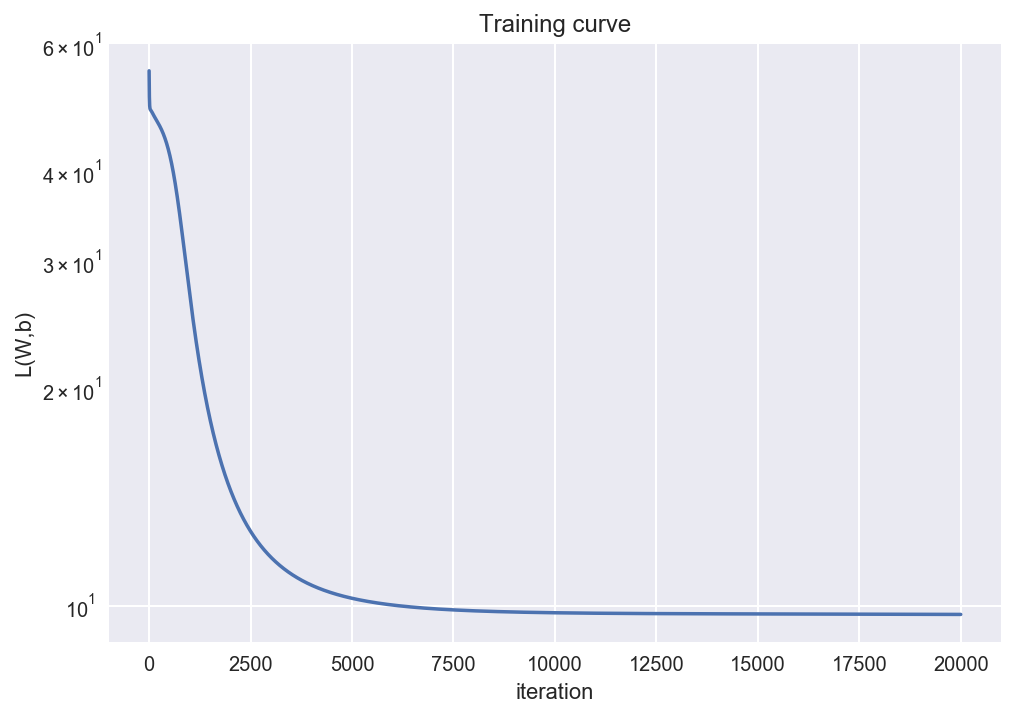

In [5]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(W,b)')
plt.semilogy(iterations, np.array(L_list).reshape(-1, 1))
plt.show()

#### Results on Training Data

In [6]:
# Prepare for decision boundary.
num = 100
X0_plane_range = np.linspace(1,7,num)
X1_plane_range = np.linspace(0,2.5,num)
X0_plane, X1_plane = np.meshgrid(X0_plane_range, X1_plane_range)
X_decision = np.stack([X0_plane.reshape(-1), X1_plane.reshape(-1)]).T

# Calculate feed-forward values.
f_decision = sigmoid(X_decision.dot(W1)+b1.T).dot(W2)+b2.T # Shape: [n,1].
yhat_decision = np.sign(f_decision)

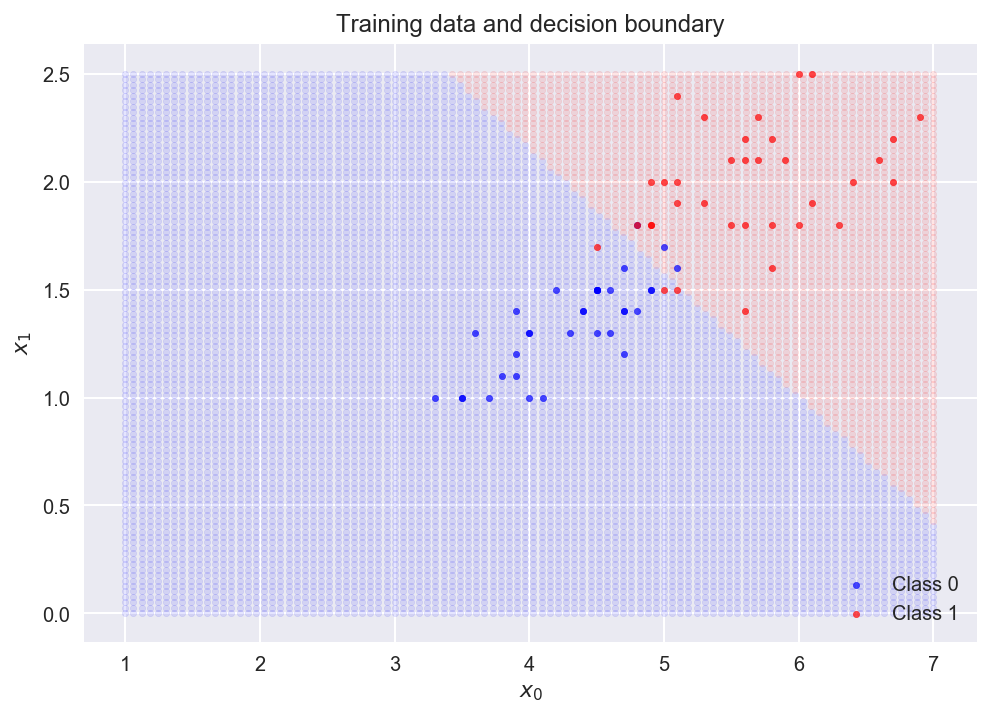

In [7]:
# Training data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==-1, 0], X_decision[yhat_decision[:,0]==-1, 1], marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], X_decision[yhat_decision[:,0]==1, 1], marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_train[Y_train[:,0]==-1, 0], X_train[Y_train[:,0]==-1, 1], marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==1, 0], X_train[Y_train[:,0]==1, 1], marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

#### Results on Test Data

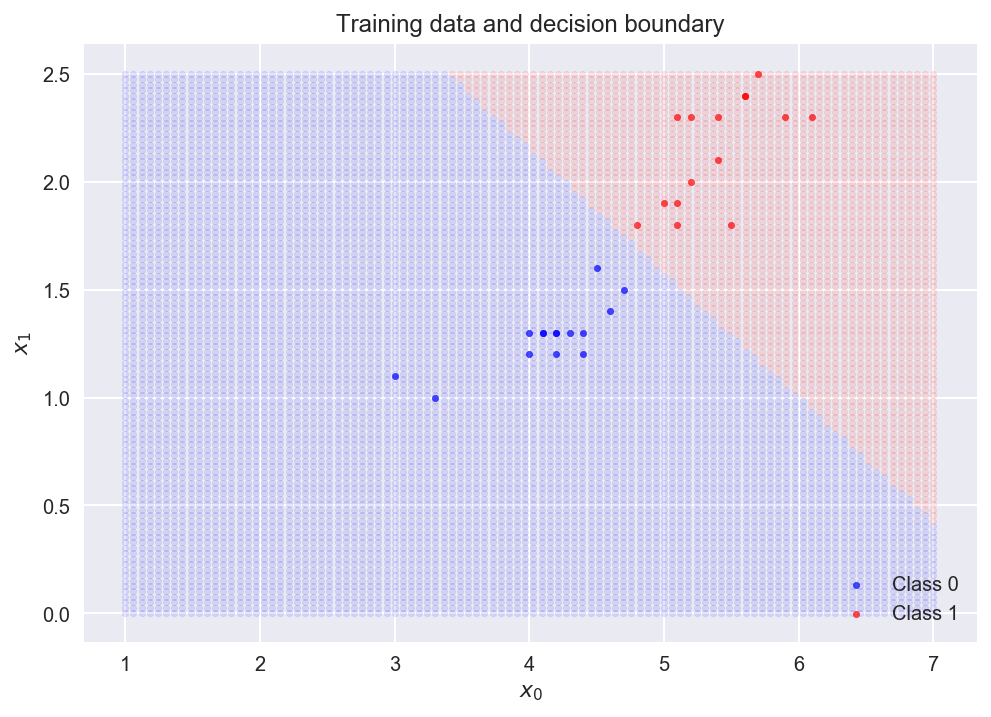

In [8]:
# Test data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==-1, 0], X_decision[yhat_decision[:,0]==-1, 1], marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], X_decision[yhat_decision[:,0]==1, 1], marker='o', color='r', alpha=0.1, s=10)

plt.scatter(X_test[Y_test[:,0]==-1, 0], X_test[Y_test[:,0]==-1, 1], marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_test[Y_test[:,0]==1, 0], X_test[Y_test[:,0]==1, 1], marker='o', color='r', alpha=0.7, s=10, label='Class 1')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

In [9]:
# Calculate the test error.
f_test = sigmoid(X_test.dot(W1)+b1.T).dot(W2)+b2.T  # Shape: [n,1].
yhat_test = np.sign(f_test)
test_error = 1 - np.sum(yhat_test == Y_test) / Y_test.shape[0]
print('Test error: {}'.format(test_error))

Test error: 0.0
